# Instalando Bibliotecas: Pymongo, Requests, BeautifulSoup e Pandas.

Primeiramente, é necessário chamar todas as bibliotecas pra conseguir ter acesso as funções que irão me permitir fazer a raspagem de dados, filtrar as informações, montar o DataFrame e importar tudo para o MongoDB.



In [1]:
! python -m pip install pymongo==3.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymongo: filename=pymongo-3.7.2-cp310-cp310-linux_x86_64.whl size=418538 sha256=20e91609288db3c338a8f31008feda559da476ccbed2158721fc654bdb9b7e96
  Stored in directory: /root/.cache/pip/wheels/a9/84/e5/e6a67499f7b68ca7d21943c056472c5965004248cc961ec515
Successfully built pymongo


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pymongo
import json

In [6]:
# CONECTANDO O PYMONGO COM O LOCALHOST

client = pymongo.MongoClient('mongodb://localhost:27017')

# 2. Declarando variáveis, raspagem de dados e filtros.

## Abaixo, se encontram os contadores, as requisições e os filtros utilizandos durante a raspagem de dados que se encontram na variável "link".

In [5]:
# LISTAS DA TABELA QUE IRÃO ENTRAR NO DATA FRAME

# LISTAS VAZIAS

lista_numero = []
lista_nomes = []
lista_habilidades = []
lista_hp = []
lista_ataque = []
lista_defesa = []
lista_ataqueesp = []
lista_defesaesp = []
lista_velocidade = []
lista_tipo = []

# REQUISIÇÕES E BEAUTIFULSOUP

link = "https://www.serebii.net/fireredleafgreen/kantopokedex.shtml"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
requisicao = requests.get(link, headers=headers)
site = BeautifulSoup(requisicao.text, "html.parser")


# FILTROS

pokedex = site.find_all('td', class_="fooinfo")
numero = pokedex[0:1661:11]
nomes = pokedex[2:1661:11]
habilidades = pokedex[3:1661:11]
hp = pokedex[5:1661:11]
ataque = pokedex[6:1661:11]
defesa = pokedex[7:1661:11]
ataqueesp = pokedex[8:1661:11]
defesaesp = pokedex[9:1661:11]
velocidade = pokedex[10:1661:11]


# 3. Loops de repetição

Loop de repetição que vai alimentar cada lista que representam as informações de cada Pokémon. Como a range da lista é a mesma para todos, foi possível juntar todas em único for.

In [ ]:
for i in range(0, len(numero)):
  coluna1 = numero[i].text.replace('\n', "").replace('\t\t',"").replace('#', '')
  coluna2 = nomes[i].text.replace('\n', '')
  coluna3 = habilidades[i].text.replace('\n', '').replace(' ', '')
  coluna4 = hp[i].text
  coluna5 = ataque[i].text
  coluna6 = defesa[i].text
  coluna7 = ataqueesp[i].text
  coluna8 = defesaesp[i].text
  coluna9 = velocidade[i].text

  lista_numero.append(coluna1)
  lista_nomes.append(coluna2)
  lista_habilidades.append(coluna3)
  lista_hp.append(coluna4)
  lista_ataque.append(coluna5)
  lista_defesa.append(coluna6)
  lista_ataqueesp.append(coluna7)
  lista_defesaesp.append(coluna8)
  lista_velocidade.append(coluna9)

# 4 Montando o DataFrame

Após serem armazenados numa lista, todos os dados serão transformados em um DataFrame.

In [7]:
# MONTANDO DATAFRAME

dados = {'Números': lista_numero, 'Nome': lista_nomes, 'Habilidades': lista_habilidades,'HP': lista_hp,'Ataque': lista_ataque, 'Defesa': lista_defesa, 'Ataque Especial': lista_ataqueesp, 'Defesa Especial': lista_defesaesp, 'Velocidade': lista_velocidade}
poke_df = pd.DataFrame(dados)

poke_df['Números'] = poke_df['Números'].astype(int)
poke_df['HP'] = poke_df['HP'].astype(int)
poke_df['Ataque'] = poke_df['Ataque'].astype(int)
poke_df['Defesa'] = poke_df['Defesa'].astype(int)
poke_df['Ataque Especial'] = poke_df['Ataque Especial'].astype(int)
poke_df['Defesa Especial'] = poke_df['Defesa Especial'].astype(int)
poke_df['Velocidade'] = poke_df['Velocidade'].astype(int)

# print(poke_df[(poke_df['Ataque'] > 100) & (poke_df['Defesa'] >= 80)])

poke_df

,Números,Nome,Habilidades,HP,Ataque,Defesa,Ataque Especial,Defesa Especial,Velocidade
0,1,Bulbasaurフシギダネ,Overgrow,45,49,49,65,65,45
1,2,Ivysaurフシギソウ,Overgrow,60,62,63,80,80,60
2,3,Venusaurフシギバナ,Overgrow,80,82,83,100,100,80
3,4,Charmanderヒトカゲ,Blaze,39,52,43,60,50,65
4,5,Charmeleonリザード,Blaze,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
146,147,Dratiniミニリュウ,ShedSkin,41,64,45,50,50,50
147,148,Dragonairハクリュー,ShedSkin,61,84,65,70,70,70
148,149,Dragoniteカイリュー,InnerFocus,91,134,95,100,100,80
149,150,Mewtwoミュウツー,Pressure,106,110,90,154,90,130


# 5 Passando para CSV

Por fim, podemos passar o arquivo para CSV e upar no MongoDB após criar uma base dados e uma coleção.

In [8]:
data = poke_df.to_csv('pokedex.csv')

# 6. No MongoDB

## No MongoDB quando uparmos o arquivo no MongoDB dentro da coleção, as informações seriam repassadas em formato que se assemelha a dicionário/json, com informações correspondentes a cada Pokémon.

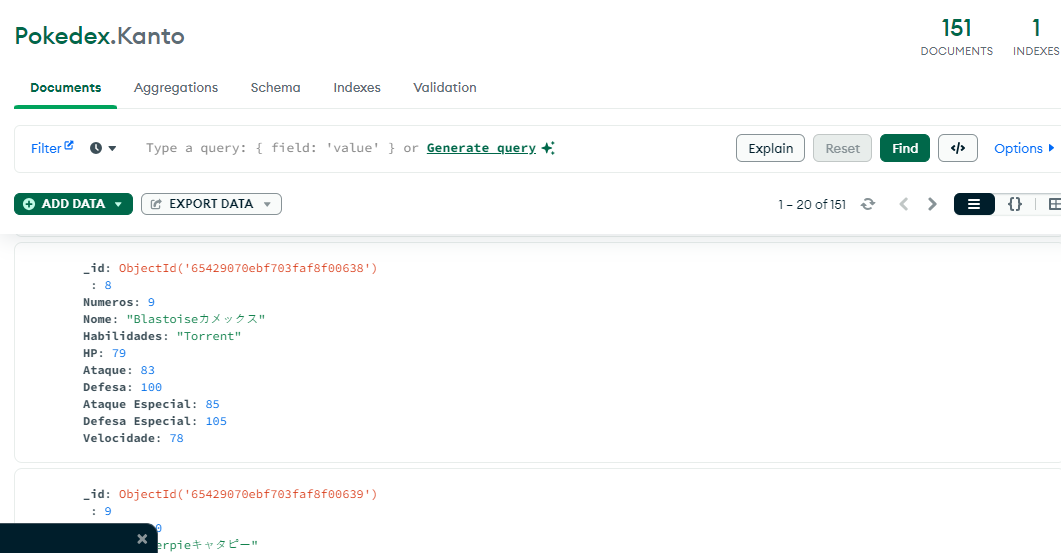